In [1]:
# Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os
import tweepy
import json
from timeit import default_timer as timer

## Data Wrangling

### Gather Data

In [2]:
# Read csv file 'twitter-archive-enhanced' and saving in a dataframe
data = pd.read_csv('Resources/twitter-archive-enhanced.csv')
data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
data.shape

(2356, 17)

In [4]:
tweet_list = list(data.tweet_id)
len(tweet_list)

2356

In [5]:
# Read image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions = pd.read_csv(url, sep='\t')
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
with open('Resources/tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [7]:
# Create a dataframe
api_data = pd.DataFrame(status)
api_data.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Jun 18 16:57:37 +0000 2017,876484053909872640,876484053909872640,This is Benedict. He wants to thank you for th...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876484043352588288, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,17505,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sat Jul 15 23:25:31 +0000 2017,886366144734445568,886366144734445568,This is Roscoe. Another pupper fallen victim t...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 886366138128449536, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,19629,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [8]:
# Displaying the columns for api_data table
for i,v in enumerate(api_data.columns):
    print(i, v)

0 created_at
1 id
2 id_str
3 full_text
4 truncated
5 display_text_range
6 entities
7 extended_entities
8 source
9 in_reply_to_status_id
10 in_reply_to_status_id_str
11 in_reply_to_user_id
12 in_reply_to_user_id_str
13 in_reply_to_screen_name
14 user
15 geo
16 coordinates
17 place
18 contributors
19 is_quote_status
20 retweet_count
21 favorite_count
22 favorited
23 retweeted
24 possibly_sensitive
25 lang
26 retweeted_status
27 quoted_status_id
28 quoted_status_id_str
29 quoted_status_permalink
30 quoted_status


### Assess Data

In [9]:
# Table 1
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df = data.loc[((data.rating_numerator < 10) | (data.rating_numerator > 20)) & (data.in_reply_to_status_id.isna())]
df1 = df[['text', 'rating_numerator']]

In [12]:
df1

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
229,This is Jerry. He's doing a distinguished tong...,6
315,When you're so blinded by your systematic plag...,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
433,The floofs have been released I repeat the flo...,84
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5
2352,This is a purebred Piers Morgan. Loves to Netf...,6
2353,Here is a very happy pup. Big fan of well-main...,9
2354,This is a western brown Mitsubishi terrier. Up...,7


In [13]:
# Increasing the column width to read full text
pd.options.display.max_colwidth = 200

In [14]:
df1

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7


In [15]:
data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [16]:
data[data.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
data.loc[(data.rating_denominator != 10) & (data.in_reply_to_status_id.isna())][['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [18]:
# Table 2
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Table 3
api_data.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Jun 18 16:57:37 +0000 2017,876484053909872640,876484053909872640,This is Benedict. He wants to thank you for this delightful urban walk. Hopes you know he loves you. 13/10 super duper good boy https://t.co/26BXueUgbs,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 876484043352588288, 'id_str': '876484043352588288', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 876484043352588288, 'id_str': '876484043352588288', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,17505,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sat Jul 15 23:25:31 +0000 2017,886366144734445568,886366144734445568,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 886366138128449536, 'id_str': '886366138128449536', 'indices': [132, 155], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 886366138128449536, 'id_str': '886366138128449536', 'indices': [132, 155], 'media_url': 'http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,19629,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Wed Jun 21 19:36:23 +0000 2017,877611172832227328,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'rachel2195', 'name': 'Rachel Baker', 'id': 512804507, 'id_str': '512804507', 'indices': [3, 14]}, {'screen_name': 'dog_rates', 'n...","{'media': [{'id': 876850756556607488, 'id_str': '876850756556607488', 'indices': [99, 122], 'media_url': 'http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False,False,False,en,"{'created_at': 'Mon Jun 19 17:14:49 +0000 2017', 'id': 876850772322988033, 'id_str': '876850772322988033', 'full_text': '@dog_rates the boyfriend and his soaking wet pupper h*cking love his new ha...",NaN,NaN,NaN,NaN
3,Thu Jul 20 16:49:33 +0000 2017,888078434458587136,888078434458587136,This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 888078426338406400, 'id_str': '888078426338406400', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 888078426338406400, 'id_str': '888078426338406400', 'indices': [128, 151], 'media_url': 'http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,20224,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{

#### Quality Issues
data table
* name, doggo, floofer, pupper and puppo columns have value with the name None
* some tweets are retweets (in_reply_to_status_id column not null), need to remove them 
* values in rating_numerator colums are incorrect if the given rating is a decimal number 
* date 9/11 is interpreted as rating for 2 tweets (index: 784, 1068)
* store 7/11 is interpreted as rating for tweet index 1662
* tweet index 2335 as incorrect rating
* source column has html tags
* timestamp column is a string. needs to be converted to datetime

image_predictions table
* p1, p2, p3 columns have '_' instead of space between words. The needs to be corrected to make it more readable.
* column names are not descriptive

#### Tidiness Issues
* tables have extra columns which can be dropped as those would not be used for analysis
* 3 tables, data can be combined to a single table to analyse data
* one variable dog_stage instead of four columns for four stages(doggo, floofer, pupper, puppo)

### Clean Data

In [20]:
# Table 3
# Droping extra columns
api_data = api_data[['id', 'retweet_count', 'favorite_count']]
api_data.head(5)

,id,retweet_count,favorite_count
0,876484053909872640,2140,17505
1,886366144734445568,2852,19629
2,877611172832227328,72,0
3,888078434458587136,3125,20224
4,891689557279858688,7763,39108


In [21]:
# Renaming column
api_data = api_data.rename(columns = {'id': 'tweet_id'})

In [22]:
api_data.head(5)

,tweet_id,retweet_count,favorite_count
0,876484053909872640,2140,17505
1,886366144734445568,2852,19629
2,877611172832227328,72,0
3,888078434458587136,3125,20224
4,891689557279858688,7763,39108


In [23]:
# Table 1
# Droping retweets (analysis only for ooriginal tweets)
data = data.loc[data.in_reply_to_status_id.isna()]

In [24]:
# Dropping extra columns
data = data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [25]:
# Replace the None in 'doggo', 'floofer', 'pupper', 'puppo' columns with empty string
data[['doggo', 'floofer', 'pupper', 'puppo']] = data[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [26]:
# Combine the columns into one column
data['dog_stage'] = data['doggo'] + data['floofer'] + data['pupper'] + data['puppo']

In [27]:
# Drop unnecessary columns
data = data.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [28]:
data.dog_stage.value_counts()

                1906
pupper           242
doggo             80
puppo             28
doggopupper       11
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [29]:
data.dog_stage = data.dog_stage.replace('doggopupper', 'multiple')
data.dog_stage = data.dog_stage.replace('doggopuppo', 'multiple')
data.dog_stage = data.dog_stage.replace('doggofloofer', 'multiple')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
dog_stage             2278 non-null object
dtypes: int64(3), object(6)
memory usage: 178.0+ KB


In [31]:
# Merging Table 3 and Table 1
tweet_data = pd.merge(data, api_data, on = 'tweet_id', how = 'inner')

In [32]:
# Convert timestamp datatype to datetime
tweet_data.timestamp = pd.to_datetime(tweet_data.timestamp)

In [33]:
# Check the numerator values where they have been incorrectly entered
pd.set_option('display.max_colwidth', 500)
tweet_data[tweet_data.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/Users/Shared/Anaconda/anaconda3/envs/PythonAll/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
43,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
307,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
647,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
713,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1629,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [34]:
tweet_data.query('rating_denominator == 11')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1007,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1581,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11


In [35]:
# Replace the incorrect ratings with correct ratings
tweet_data.loc[1007, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data.loc[1581, 'rating_numerator':'rating_denominator'] = [10, 10]

tweet_data.loc[43, 'rating_numerator':'rating_denominator'] = [13.50, 10]

tweet_data.loc[307, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[647, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[713, 'rating_numerator':'rating_denominator'] = [11.27, 10]

tweet_data.loc[1629, 'rating_numerator':'rating_denominator'] = [11.26, 10]

In [36]:
# Check the distribution of source values 
tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2119
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [37]:
# Replace the values in the source column with human readable text
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_data.source = tweet_data.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_data.source = tweet_data.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [38]:
tweet_data.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,7594,35855
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,5626,30930
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,3721,23281
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,7763,39108
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,,8368,37361


In [39]:
# Table 2
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
image_predictions.p1 = image_predictions.p1.str.replace('_', ' ').str.title()
image_predictions.p2 = image_predictions.p2.str.replace('_', ' ').str.title()
image_predictions.p3 = image_predictions.p3.str.replace('_', ' ').str.title()

In [41]:
# Renaming columns to descriptive names
image_predictions = image_predictions.rename(columns = {'jpg_url':'image_url','img_num':'image_number', \
                                                        'p1':'first_prediction',\
                                                        'p2':'second_prediction', \
                                                        'p3':'third_prediction', \
                                                        'p1_conf':'first_prediction_confidence', \
                                                        'p2_conf':'second_prediction_confidence', \
                                                        'p3_conf':'third_prediction_confidence', \
                                                        'p1_dog':'first_prediction_dog', \
                                                        'p2_dog':'second_prediction_dog', \
                                                        'p3_dog':'third_prediction_dog'})

In [42]:
image_predictions.head(5)

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
# Combing tweet_data df with Table 2
tweet_data_master = pd.merge(tweet_data, image_predictions, on = 'tweet_id', how = 'inner')
tweet_data_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,7594,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,5626,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,3721,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,7763,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,,8368,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [44]:
tweet_data_master.shape

(2036, 22)

In [45]:
# Saving data to a CSV file
tweet_data_master.to_csv('Output/twitter_archive_master.csv', index=False)

## Data Analysis

What does the relationship between retweets and favorites look like?

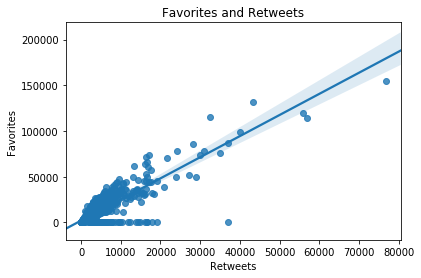

In [46]:
g = sns.regplot(x=tweet_data_master.retweet_count, y=tweet_data_master.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
fig = g.get_figure()

In [47]:
tweet_data_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,image_number,first_prediction_confidence,first_prediction_dog,second_prediction_confidence,second_prediction_dog,third_prediction_confidence,third_prediction_dog
tweet_id,1.000000,0.024049,-0.019280,0.387436,0.572101,0.209079,0.100502,0.114279,0.004451,0.114569,-0.039883,0.088210
rating_numerator,0.024049,1.000000,0.185930,0.018230,0.016824,-0.002261,-0.006650,-0.030781,-0.019166,-0.034057,-0.004573,-0.030751
rating_denominator,-0.019280,0.185930,1.000000,-0.018995,-0.022854,-0.016938,0.007890,-0.004244,-0.031614,-0.005768,0.006396,0.000019
retweet_count,0.387436,0.018230,-0.018995,1.000000,0.861705,0.106922,0.042492,0.001369,-0.004822,0.013848,-0.030795,0.000783
favorite_count,0.572101,0.016824,-0.022854,0.861705,1.000000,0.126338,0.065385,0.043404,-0.017568,0.051634,-0.045529,0.036055
image_number,0.209079,-0.002261,-0.016938,0.106922,0.126338,1.000000,0.202493,0.026945,-0.160456,0.051787,-0.135931,0.055553
first_prediction_confidence,0.100502,-0.006650,0.007890,0.042492,0.065385,0.202493,1.000000,0.115042,-0.513094,0.130853,-0.709026,0.107161
first_prediction_dog,0.114279,-0.030781,-0.004244,0.001369,0.043404,0.026945,0.115042,1.000000,0.114928,0.637592,0.055004,0.558206
second_prediction_confidence,0.004451,-0.019166,-0.031614,-0.004822,-0.017568,-0.160456,-0.513094,0.114928,1.000000,0.102987,0.480107,0.067534
second_prediction_dog,0.114569,-0.034057,-0.005768,0.013848,0.051634,0.051787,0.130853,0.637592,0.102987,1.000000,0.044123,0.555478


/Users/Shared/Anaconda/anaconda3/envs/PythonAll/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


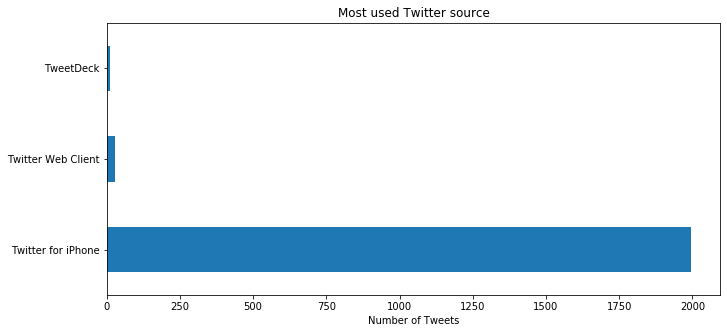

In [48]:
tweet_data_master['source'].value_counts()\
                            .plot('barh', figsize=(11,5), title='Most used Twitter source')\
                            .set_xlabel("Number of Tweets");

### Observations
* There is a strong positive correlation (0.92) between retweet_count and favorite_count
* The number of tweets made by WeRate Dogs has decreased over the years
* Almost all the tweets made by WeRateDogs are using the phone app